In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sklearn
import nltk
from nltk.corpus import stopwords

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
# HODI @ EVALITA 2023
# https://hodi-evalita.github.io/ https://github.com/HODI-EVALITA/HODI_2023

root = '/content/gdrive/MyDrive/Colab Notebooks/torch/'
df = pd.read_csv(root+'data/HODI/HODI_2023_train_subtaskA.tsv', sep='\t')

In [28]:
df.head()

,id,text,homotransphobic
0,1,Hanno rotto le #palle con i €compleanni a #dop...,0
1,2,"@user_abc Avete rotto,come potete prendere se ...",0
2,3,Guevara si è rotto il cazzo e ha mandato a far...,0
3,4,@user_abcd Se io volessi entrare in un bar con...,0
4,5,@user_abcdef @user_abc @user_abcdefgh Ok nessu...,0


n sample ->  5000
homotransphobic
0    2992
1    2008
Name: count, dtype: int64


<Axes: xlabel='homotransphobic'>

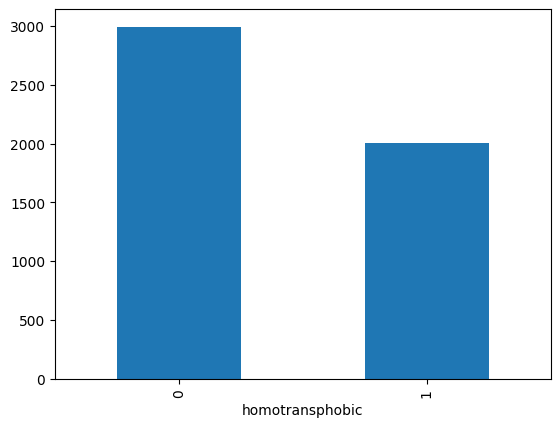

In [13]:
print('n sample -> ', len(df))
print(df['homotransphobic'].value_counts())
df.groupby(['homotransphobic']).size().plot.bar()

In [27]:
print(df.at[7, 'text'])
print(df.at[7, 'homotransphobic'])

print(df.at[4997, 'text'])
print(df.at[4997, 'homotransphobic'])

Alla #conversations di #fratellidindrangheta il grido di battaglia è: "energia da liberare". Speriamo che non caghino tutti insieme.😟😂 [URL]
0
@user_abcde @user_abc stai zitto coglione e fatti bombardare da putin magari diventi più bello con quei capelli rossi da ricchione
1


**Emoji/Emoticons**

In [99]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 18.3 MB/s eta 0:00:00


In [128]:
import emoji
# https://github.com/kyokomi/emoji

print(df.at[7, 'text'])
emoji_intext = list(dict.fromkeys([e['emoji'] for e in emoji.emoji_list(df.at[7, 'text'])]))
print(emoji_intext)
emoji.EMOJI_DATA[emoji_intext[0]]

Alla #conversations di #fratellidindrangheta il grido di battaglia è: "energia da liberare". Speriamo che non caghino tutti insieme.😟😂 [URL]
['😟', '😂']


{'en': ':worried_face:', 'status': 2, 'E': 1, 'alias': [':worried:']}

**Tokenization**

In [39]:
# https://www.nltk.org/

nltk.download('punkt_tab') #it contains data for the library (tokenizers and corpora)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download()

In [83]:
s_en = 'The quick brown fox, jumps over: THE LAZY DOG.'
t_en = nltk.word_tokenize(s_en)
print(t_en)

['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'THE', 'LAZY', 'DOG', '.']


In [62]:
s_it = 'La veloce volpe marrone, salta sopra: IL CANE PIGRO.'
t_it = nltk.word_tokenize(s_it)
print(t_it)

['La', 'veloce', 'volpe', 'marrone', ',', 'salta', 'sopra', ':', 'IL', 'CANE', 'PIGRO', '.']


In [55]:
import re

s = 'The quick brown fox, jumps over: the lazy dog.'
print(s)
s = re.sub(r'[^\w]+', ' ', s)
print(s)
t = nltk.word_tokenize(s)
print(t)

The quick brown fox, jumps over: the lazy dog.
The quick brown fox jumps over the lazy dog 
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


**Stemming**

In [64]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
print(t_en)
stem = [stemmer.stem(w) for w in t_en]
print(stem)

['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'THE', 'LAZY', 'DOG', '.']
['the', 'quick', 'brown', 'fox', ',', 'jump', 'over', ':', 'the', 'lazi', 'dog', '.']


In [65]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('italian')
print(t_it)
stem = [stemmer.stem(w) for w in t_it]
print(stem)

['La', 'veloce', 'volpe', 'marrone', ',', 'salta', 'sopra', ':', 'IL', 'CANE', 'PIGRO', '.']
['la', 'veloc', 'volp', 'marron', ',', 'salt', 'sopr', ':', 'il', 'can', 'pigr', '.']


**Lemmatization**

In [61]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print(wnl.lemmatize('dogs'))
print(wnl.lemmatize('bellissimo'))

dog
bellissimo


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
print(s_en)
lemmas_en = [wnl.lemmatize(x) for x in t_en]
print(lemmas_en)

The quick brown fox, jumps over: THE LAZY DOG.
['The', 'quick', 'brown', 'fox', ',', 'jump', 'over', ':', 'THE', 'LAZY', 'DOG', '.']


In [ ]:
!python -m spacy download it_core_news_sm

In [78]:
import spacy
# https://spacy.io/models/it

# Load Italian model
nlp = spacy.load("it_core_news_sm")

print(s_it)

doc = nlp(s_it)
lemmas = [token.lemma_ for token in doc]
print(lemmas)
print(list(zip([t.text for t in doc], lemmas)))

La veloce volpe marrone, salta sopra: IL CANE PIGRO.
['il', 'veloce', 'volpe', 'marrone', ',', 'saltare', 'sopra', ':', 'iL', 'CANE', 'PIGRO', '.']
[('La', 'il'), ('veloce', 'veloce'), ('volpe', 'volpe'), ('marrone', 'marrone'), (',', ','), ('salta', 'saltare'), ('sopra', 'sopra'), (':', ':'), ('IL', 'iL'), ('CANE', 'CANE'), ('PIGRO', 'PIGRO'), ('.', '.')]


**Stopwords**

In [80]:
nltk.download('stopwords')

stop = stopwords.words('english')
print(f'there are {len(stop)} stopwords\n')
print(stop)

stop = stopwords.words('italian')
print(f'there are {len(stop)} stopwords\n')
print(stop)

there are 198 stopwords

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
stop = stopwords.words('english')
# w/o stemming
print(t_en)
# lower words
filtered_s = [w for w in t_en if not w.lower() in stop]
print(filtered_s)
# w/o lower words
filtered_s2 = [w for w in t_en if not w in stop]
print(filtered_s2)
# stemming
filtered_s3 = [stemmer.stem(w) for w in t_en]
print(filtered_s3)

['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'THE', 'LAZY', 'DOG', '.']
['quick', 'brown', 'fox', ',', 'jumps', ':', 'LAZY', 'DOG', '.']
['The', 'quick', 'brown', 'fox', ',', 'jumps', ':', 'THE', 'LAZY', 'DOG', '.']
['the', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'the', 'lazy', 'dog', '.']


In [87]:
stop = stopwords.words('italian')
# w/o stemming
print(t_it)
# lower words
filtered_s = [w for w in t_it if not w.lower() in stop]
print(filtered_s)
# w/o lower words
filtered_s2 = [w for w in t_it if not w in stop]
print(filtered_s2)
# stemming
filtered_s3 = [stemmer.stem(w) for w in t_it]
print(filtered_s3)

['La', 'veloce', 'volpe', 'marrone', ',', 'salta', 'sopra', ':', 'IL', 'CANE', 'PIGRO', '.']
['veloce', 'volpe', 'marrone', ',', 'salta', 'sopra', ':', 'CANE', 'PIGRO', '.']
['La', 'veloce', 'volpe', 'marrone', ',', 'salta', 'sopra', ':', 'IL', 'CANE', 'PIGRO', '.']
['la', 'veloc', 'volp', 'marron', ',', 'salt', 'sopr', ':', 'il', 'can', 'pigr', '.']


In [129]:
# tokenization over dataset
df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(re.sub(r'[^\w]+', ' ', x)))
# removing stopwords over dataset
df['filtered'] = df['tokenized'].apply(lambda x: [w for w in x if not w.lower() in stop])
# stemming over dataset
df['stemmed'] = df['filtered'].apply(lambda x: [stemmer.stem(w) for w in x])

print(df.at[7, 'text'])
print(df.at[7, 'tokenized'])
print(df.at[7, 'filtered'])
print(df.at[7, 'stemmed'])

Alla #conversations di #fratellidindrangheta il grido di battaglia è: "energia da liberare". Speriamo che non caghino tutti insieme.😟😂 [URL]
['Alla', 'conversations', 'di', 'fratellidindrangheta', 'il', 'grido', 'di', 'battaglia', 'è', 'energia', 'da', 'liberare', 'Speriamo', 'che', 'non', 'caghino', 'tutti', 'insieme', 'URL']
['conversations', 'fratellidindrangheta', 'grido', 'battaglia', 'energia', 'liberare', 'Speriamo', 'caghino', 'insieme', 'URL']
['conversations', 'fratellidindranghet', 'grid', 'battagl', 'energ', 'liber', 'sper', 'caghin', 'insiem', 'url']


**N-grams**

In [133]:
print(df.at[7, 'stemmed'])

# generate bigrams/trigrams
ngrams = list(nltk.ngrams(df.at[7, 'stemmed'], 3))

print(ngrams)

['conversations', 'fratellidindranghet', 'grid', 'battagl', 'energ', 'liber', 'sper', 'caghin', 'insiem', 'url']
[('conversations', 'fratellidindranghet', 'grid'), ('fratellidindranghet', 'grid', 'battagl'), ('grid', 'battagl', 'energ'), ('battagl', 'energ', 'liber'), ('energ', 'liber', 'sper'), ('liber', 'sper', 'caghin'), ('sper', 'caghin', 'insiem'), ('caghin', 'insiem', 'url')]


In [92]:
# nel dataframe i nostri input devono essere dei testi e non delle liste
# concateniamo quindi gli elementi delle liste con la funzione join in modo da avere solo stringe

df['tokenized_text'] = df['tokenized'].apply(lambda x: " ".join(x))
df['filtered_text'] = df['filtered'].apply(lambda x: " ".join(x))
df['cured_text'] = df['stemmed'].apply(lambda x: " ".join(x))

print(df.at[4998, 'tokenized'])
print(df.at[4998, 'tokenized_text'])

print(df.at[4998, 'filtered'])
print(df.at[4998, 'filtered_text'])

print(df.at[4998, 'stemmed'])
print(df.at[4998, 'cured_text'])

['user_abcdefgh', 'user_abcdefghij', 'Lesbiche', 'Non', 'lo', 'so', 'Per', 'me', 'sono', 'solo', 'delle', 'squadriste', 'rosse']
user_abcdefgh user_abcdefghij Lesbiche Non lo so Per me sono solo delle squadriste rosse
['user_abcdefgh', 'user_abcdefghij', 'Lesbiche', 'so', 'me', 'solo', 'squadriste', 'rosse']
user_abcdefgh user_abcdefghij Lesbiche so me solo squadriste rosse
['user_abcdefg', 'user_abcdefghij', 'lesbic', 'so', 'me', 'sol', 'squadrist', 'ross']
user_abcdefg user_abcdefghij lesbic so me sol squadrist ross


In [93]:
df.head()

,id,text,homotransphobic,tokenized,filtered,stemmed,tokenized_text,filtered_text,cured_text
0,1,Hanno rotto le #palle con i €compleanni a #dop...,0,"[Hanno, rotto, le, palle, con, i, compleanni, ...","[rotto, palle, compleanni, doppio, leoanrdo, c...","[rott, pall, compleann, dopp, leoanrd, cio, le...",Hanno rotto le palle con i compleanni a doppio...,rotto palle compleanni doppio leoanrdo cioè le...,rott pall compleann dopp leoanrd cio leoanrd d...
1,2,"@user_abc Avete rotto,come potete prendere se ...",0,"[user_abc, Avete, rotto, come, potete, prender...","[user_abc, rotto, potete, prendere, pubblicità...","[user_abc, rott, pot, prend, pubblic, fat, tut...",user_abc Avete rotto come potete prendere se l...,user_abc rotto potete prendere pubblicità fate...,user_abc rott pot prend pubblic fat tutt negat...
2,3,Guevara si è rotto il cazzo e ha mandato a far...,0,"[Guevara, si, è, rotto, il, cazzo, e, ha, mand...","[Guevara, rotto, cazzo, mandato, fare, culo, M...","[guevar, rott, cazz, mand, far, cul, mas, incr...",Guevara si è rotto il cazzo e ha mandato a far...,Guevara rotto cazzo mandato fare culo Masia In...,guevar rott cazz mand far cul mas incred capac...
3,4,@user_abcd Se io volessi entrare in un bar con...,0,"[user_abcd, Se, io, volessi, entrare, in, un, ...","[user_abcd, volessi, entrare, bar, trombetta, ...","[user_abcd, voless, entrar, bar, trombett, cul...",user_abcd Se io volessi entrare in un bar con ...,user_abcd volessi entrare bar trombetta culo l...,user_abcd voless entrar bar trombett cul lev r...
4,5,@user_abcdef @user_abc @user_abcdefgh Ok nessu...,0,"[user_abcdef, user_abc, user_abcdefgh, Ok, nes...","[user_abcdef, user_abc, user_abcdefgh, Ok, nes...","[user_abcdef, user_abc, user_abcdefg, ok, ness...",user_abcdef user_abc user_abcdefgh Ok nessuno ...,user_abcdef user_abc user_abcdefgh Ok nessuno ...,user_abcdef user_abc user_abcdefg ok nessun di...


In [100]:
(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(df['cured_text'], df['homotransphobic'], test_size = 0.2, random_state = 17)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4000 4000
1000 1000


In [101]:
# oltre ad usare NLTK, possiamo usare CountVectorizer di sklearn per generare i
# ngrams ma questo metodo implementa anche una vettorizzazione, che ci serve
# per la successiva fase di classificazione

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(2,2))
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [102]:
print(X_train.shape)
print(X_test.shape)

# la seconda dimensione è la grandezza del vocabolario/feature

(4000, 42097)
(1000, 42097)


In [103]:
# overview delle feature/elementi del vocabolario, tutti gli n-gramns generati a partire dal training set
print(vectorizer.get_feature_names_out())
#versione vettoriale del primo sample
print(X_train[0].toarray())
# è un vettore riga in "one-hot encoding" ma ho le frequenze

['00 13' '00 luc' '000 eur' ... 'جنسيا merd' 'شاذ جنسيا'
 '방탄의_수고는_아미가_알아 diocan']
[[0 0 0 ... 0 0 0]]


In [104]:
for element in X_train[0]:
    print(element)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (1, 42097)>
  Coords	Values
  (0, 39331)	1
  (0, 3521)	1
  (0, 16842)	1
  (0, 26668)	1
  (0, 12939)	1
  (0, 14272)	1
  (0, 35718)	1
  (0, 24032)	1
  (0, 8451)	1
  (0, 34869)	1
  (0, 4728)	1
  (0, 21945)	1


In [105]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
preds = classifier.predict(X_test)

print(f'Accuacy -> {accuracy_score(y_test, preds):0.4f}')
print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

print(classification_report(y_test, preds))

Accuacy -> 0.7050
F1-score -> 0.6677
Precision -> 0.6888
Recall -> 0.6628
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       619
           1       0.65      0.49      0.56       381

    accuracy                           0.70      1000
   macro avg       0.69      0.66      0.67      1000
weighted avg       0.70      0.70      0.69      1000



In [109]:
from sklearn.model_selection import train_test_split
def classification_procedure(df, feature, n_grams):
    (x_train, x_test, y_train, y_test) = train_test_split(df[feature], df['homotransphobic'], test_size=0.2, random_state=17)
    vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range = (n_grams, n_grams))
    X_train = vectorizer.fit_transform(x_train)
    X_test = vectorizer.transform(x_test)

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    preds = classifier.predict(X_test)

    print('MODEL -> '+feature+'-'+str(n_grams))

    print(f'Accuacy -> {accuracy_score(y_test, preds):0.4f}')
    print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
    print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
    print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

    print(classification_report(y_test, preds))

In [110]:
classification_procedure(df, feature='cured_text', n_grams=2)

MODEL -> cured_text-2
Accuacy -> 0.7030
F1-score -> 0.6655
Precision -> 0.6864
Recall -> 0.6607
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       619
           1       0.65      0.48      0.55       381

    accuracy                           0.70      1000
   macro avg       0.69      0.66      0.67      1000
weighted avg       0.70      0.70      0.69      1000



In [111]:
classification_procedure(df, feature='cured_text', n_grams=3)

MODEL -> cured_text-3
Accuacy -> 0.6480
F1-score -> 0.4803
Precision -> 0.7125
Recall -> 0.5436
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       619
           1       0.78      0.10      0.19       381

    accuracy                           0.65      1000
   macro avg       0.71      0.54      0.48      1000
weighted avg       0.70      0.65      0.55      1000



Ripetere questi passaggi per i task di **EVALITA 2026**, concentrandosi sul pre-processing del dato. La pipeline proposta è molto semplice e non costituisce un modello valido ai fini del progetto.

Nella pipeline di pre-processing ci sono diversi aspetti da considerare in base al tipo di dato:

    - stopwords
    - emoji, emoticons, hashtags
    - case-sensitive
    - analisi parole frequenti
    - analisi della lunghezza